In [2]:
# Basic module
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

---------------
#### ■データの読み込み
---------------

In [3]:
train = pd.read_csv('../../data/raw/train.csv')
test = pd.read_csv('../../data/raw/test.csv')

In [4]:
# 先頭５行表示
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,23.059782,6,140,110,2815,17.977429,80,1,dodge aspen
1,3,17.674521,8,350,150,4456,13.514535,72,1,dodge rampage
2,4,17.136353,8,302,140,2774,13.209912,79,1,mercury cougar brougham
3,7,22.664666,6,400,85,2190,15.196381,71,1,pontiac j2000 se hatchback
4,9,17.872018,8,429,220,2245,9.621400,70,1,ford galaxie 500


In [5]:
# 先頭５行表示
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,4,98,67,2000,15.049795,81,1,peugeot 504
1,2,4,97,90,2720,15.339172,79,1,dodge aspen
2,5,4,90,75,2807,17.821599,77,1,dodge monaco brougham
3,6,4,140,110,2807,13.780354,82,2,buick century limited
4,8,4,121,85,3070,13.688921,73,2,saab 99le


In [6]:
# info - 欠損値、データ数、型の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
id              500 non-null int64
mpg             500 non-null float64
cylinders       500 non-null int64
displacement    500 non-null int64
horsepower      500 non-null object
weight          500 non-null int64
acceleration    500 non-null float64
model year      500 non-null int64
origin          500 non-null int64
car name        500 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 39.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
id              500 non-null int64
cylinders       500 non-null int64
displacement    500 non-null int64
horsepower      500 non-null object
weight          500 non-null int64
acceleration    500 non-null float64
model year      500 non-null int64
origin          500 non-null int64
car name        500 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 35.3+ KB


In [8]:
# 欠損値確認（念のため）
train.isnull().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
# 統計情報確認
train.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,500.176000,27.010940,5.192000,194.762000,2719.71400,15.300328,76.332000,1.420000
std,288.657179,7.356249,1.617519,106.277425,717.03541,2.261096,3.909007,0.759443
min,0.000000,15.787613,4.000000,79.000000,1755.00000,9.530859,70.000000,1.000000
25%,242.250000,22.396641,4.000000,104.000000,2178.75000,13.441562,73.000000,1.000000
50%,513.000000,26.228984,4.000000,140.000000,2615.00000,15.231923,76.000000,1.000000
75%,750.250000,35.088333,6.000000,302.000000,3193.00000,17.190531,80.000000,2.000000
max,997.000000,44.763897,8.000000,429.000000,4732.00000,21.922511,82.000000,3.000000


##### 簡単な考察
- id: ただのIDっぽい　⇒　drop対象  
- mpg：　今回の目的変数　⇒　対象外
- cylinders： データの半数が4, その他が6,8 ⇒ 3パターンのみ？後で確認
- displacement：最大と最小値で開きが大きい感じ
- weight：　なだらかな変化っぽい
- acceleration：　標準偏差が小さいのでそこまでばらついていなそう
- model year：　年式　⇒　関わってきそう
- origin：　起源？後で確認

----------------
##### ■EDA
-----------------

##### mpg

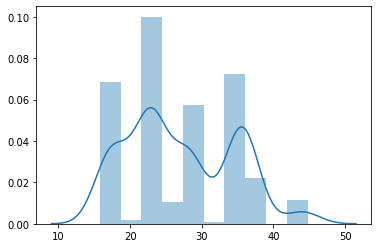

In [10]:
# mpg
sns.distplot(train['mpg'].values)

##### cylinders列

(array([305.,   0.,   0.,   0.,   0.,  92.,   0.,   0.,   0., 103.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <a list of 10 Patch objects>)

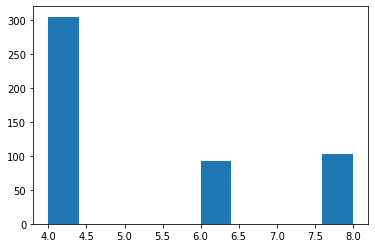

In [11]:
# ヒストグラム
plt.hist(train['cylinders'].values)

In [12]:
# カラムのユニーク値列挙
print('学習データ:', train['cylinders'].unique())
print('テストデータ:', test['cylinders'].unique())

学習データ: [6 8 4]
テストデータ: [4 6 8]


In [13]:
# 値ごとに抽出
four = train[train['cylinders'] == 4]
six = train[train['cylinders'] == 6]
eight = train[train['cylinders'] == 8]

print('データ数:', len(four)+len(six)+len(eight))

データ数: 500


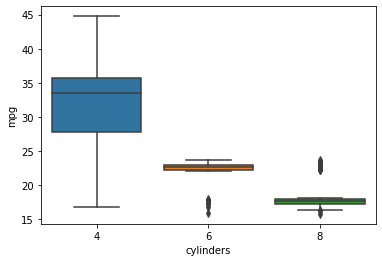

In [14]:
# 各値と目的変数(mpg)の関係
sns.boxplot(x='cylinders', y='mpg', data=train)

- 説明変数として使えそう

In [15]:
test['cylinders'].unique()

array([4, 6, 8], dtype=int64)

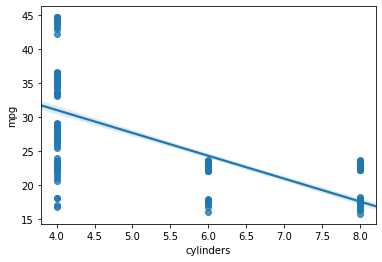

In [16]:
# 各値と目的変数(mpg)の関係
sns.regplot(x='cylinders', y='mpg', data=train)

- MinMaxscaleでいいかな

##### displacement列

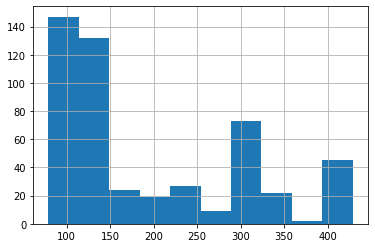

In [17]:
# ヒストグラム
train['displacement'].hist()

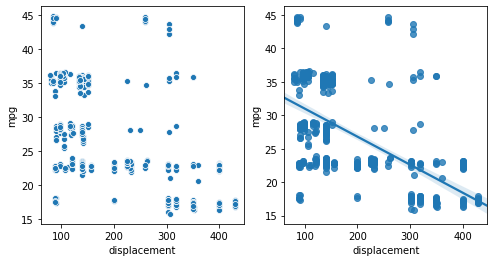

In [18]:
# 散布図 (displacement：整数値)
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.scatterplot(train['displacement'], train['mpg'], ax=ax[0])
sns.regplot(train['displacement'], train['mpg'],ax=ax[1])

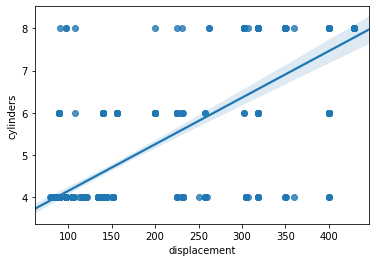

In [19]:
# 散布図: cylinders - displacement
sns.regplot(train['displacement'], train['cylinders'])

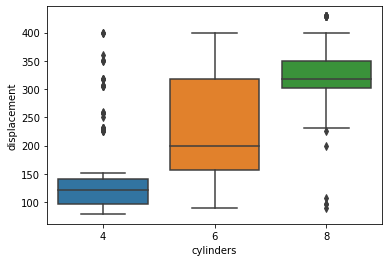

In [20]:
# box plot
sns.boxplot(x='cylinders', y='displacement', data=train)

- cylindersと相関ありそうなので、ドロップしたほうがいいかも

##### horsepower

In [21]:
# objectの型になっている
train['horsepower'].dtype

dtype('O')

In [22]:
# 数値以外を検索
drop_idx = []
for idx, value in enumerate(train['horsepower']):
    if not value.isnumeric():
        drop_idx.append(idx)
        print(idx, value)        

10 ?
48 ?
224 ?
286 ?
320 ?
407 ?
415 ?
455 ?
487 ?


In [23]:
# 欠損値?を処理
# ?以外を取得
values_df = train[train['horsepower'] != '?']['horsepower']
print(type(values_df[0]),len(values_df))
# print('mean_old:', train['horsepower'].values.mean() # strのためerror

# float64変換
values_float = values_df.astype('float64')
print(type(values_float[0]),len(values_float))
print(values_float.mean())


<class 'str'> 491
<class 'numpy.float64'> 491
106.84521384928716


In [24]:
# # 平均値で補完
# train.loc[train['horsepower']=='?','horsepower'] = values_float.mean()

# # Dataframeをfloatに変換
# train['horsepower'] = train['horsepower'].astype('float64')

In [25]:
# 欠損値はdrop
train = train.drop(drop_idx)

# Dataframeをfloatに変換
train['horsepower'] = train['horsepower'].astype('float64')

In [26]:
# 型確認
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 499
Data columns (total 10 columns):
id              491 non-null int64
mpg             491 non-null float64
cylinders       491 non-null int64
displacement    491 non-null int64
horsepower      491 non-null float64
weight          491 non-null int64
acceleration    491 non-null float64
model year      491 non-null int64
origin          491 non-null int64
car name        491 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 42.2+ KB


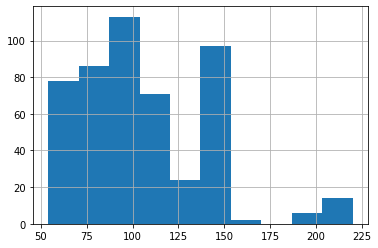

In [27]:
# ヒストグラム
train['horsepower'].hist()

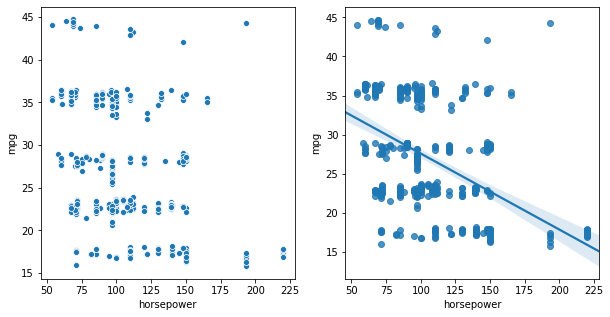

In [28]:
# 散布図
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x='horsepower', y='mpg', data=train, ax=ax[0])
sns.regplot(x='horsepower', y='mpg', data=train, ax=ax[1])

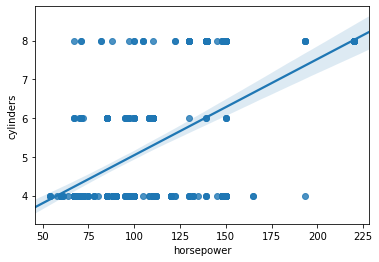

In [29]:
# 散布図: cylinders - displacement
sns.regplot(train['horsepower'], train['cylinders'])

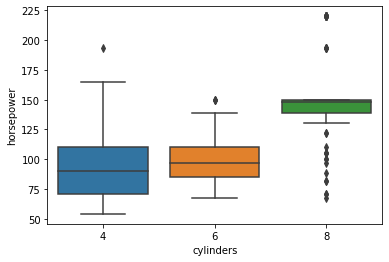

In [30]:
# box plot
sns.boxplot(x='cylinders', y='horsepower', data=train)

- Standard scaleかな

##### weight

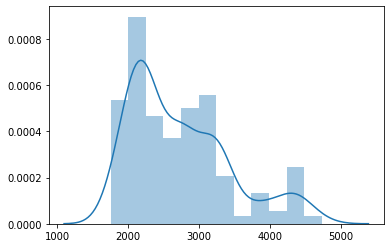

In [31]:
# ヒストグラム
sns.distplot(train['weight'].values)

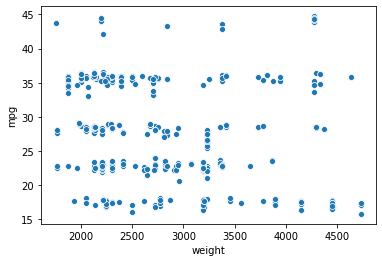

In [32]:
# 散布図
sns.scatterplot(x=train['weight'], y=train['mpg'])

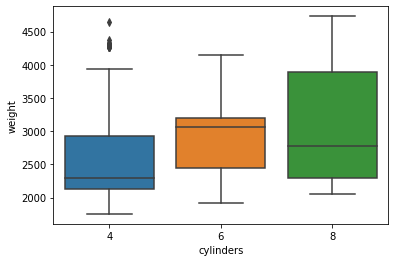

In [33]:
# 散布図: cylinders - weight
sns.boxplot(x='cylinders', y='weight', data=train)

- Standard scaleかな

##### acceleration列

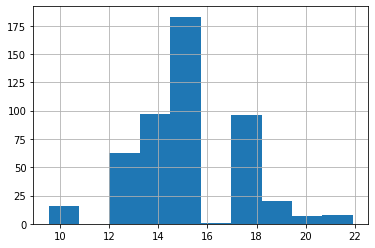

In [34]:
# ヒストグラム
train['acceleration'].hist()

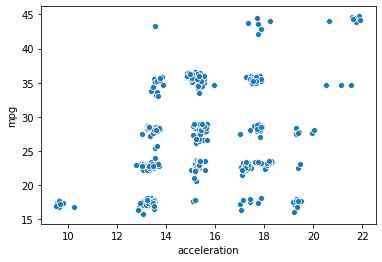

In [35]:
# 散布図
sns.scatterplot(x='acceleration',y='mpg', data=train)

- Standard scaleでいいかな

##### model year列


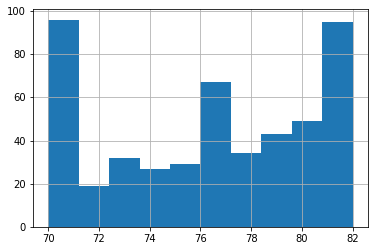

In [36]:
# ヒストグラム
train['model year'].hist()

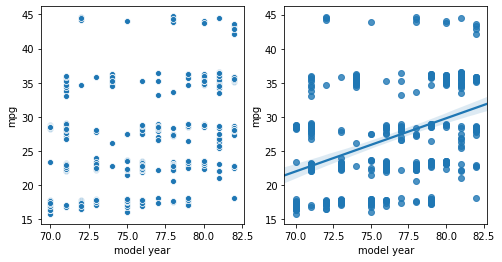

In [37]:
# 散布図
fig, ax = plt.subplots(1,2,figsize=(8,4))
sns.scatterplot(x='model year', y='mpg', data=train, ax=ax[0])
sns.regplot(x='model year', y='mpg', data=train, ax=ax[1])

In [38]:
print(np.max(test['model year'].values))

82


In [39]:
print(np.min(test['model year'].values))

70


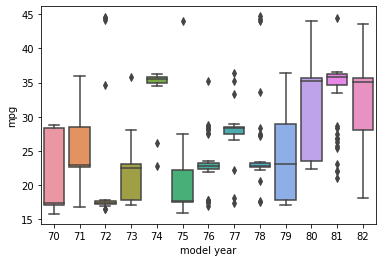

In [40]:
# box plot
sns.boxplot(x='model year', y='mpg', data=train)

- One-hot-encodingした方がいいかも

##### origin列

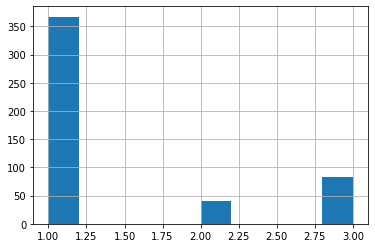

In [41]:
# ヒストグラム
train['origin'].hist()

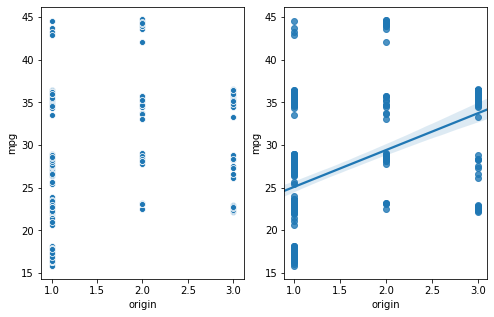

In [42]:
# 散布図
fig, ax = plt.subplots(1,2, figsize=(8,5))
sns.scatterplot(x='origin', y='mpg', data=train, ax=ax[0])
sns.regplot(x='origin', y='mpg', data=train, ax=ax[1])

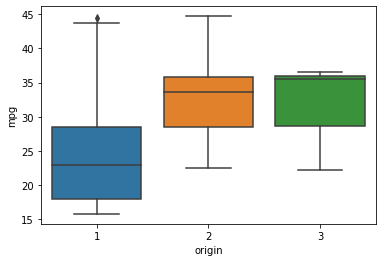

In [43]:
# box plot
sns.boxplot(x='origin', y='mpg', data=train)

- One-hot-encoding

##### car name列

In [44]:
train['car name'].unique()

array(['dodge aspen', 'dodge rampage', 'mercury cougar brougham',
       'pontiac j2000 se hatchback', 'ford galaxie 500',
       'vw rabbit custom', 'amc gremlin', 'dodge monaco brougham',
       'datsun 200sx', 'pontiac lemans v6', 'datsun 210',
       'peugeot 505s turbo diesel', 'datsun 200-sx', 'chevrolet vega',
       'datsun 710', 'ford futura', 'fiat 124 sport coupe',
       'triumph tr7 coupe', 'buick century', 'honda civic 1300',
       'vw rabbit', 'chevrolet nova', 'buick regal sport coupe (turbo)',
       'ford gran torino', 'ford pinto', 'chevrolet caprice classic',
       'peugeot 504', 'buick lesabre custom', 'chevrolet woody',
       'opel 1900', 'capri ii', 'mercury capri 2000',
       'chevrolet monza 2+2', 'dodge aries se', 'datsun 210 mpg',
       'datsun 810 maxima', 'pontiac astro', 'toyota mark ii',
       'ford mustang ii 2+2', 'datsun pl510', 'chevrolet impala',
       'audi 5000s (diesel)', 'buick century limited',
       'volkswagen rabbit custom diesel', 'a

#### Maker List
- ford  
- dodge  
- volkswagen    
- datsun  
- honda  
- toyota
- audi
- amc
- plymouth

- メーカーごとにOne-hot-encodingした方がいいかも

In [46]:
# メーカのkey-valueaリスト作成
Maker_dict = {
    'ford': 'ford',
    'mercury': 'ford',
    'capri': 'ford',
    'dodge': 'dodge',
    'volkswagen': 'volkswagen',
    'vw': 'volkswagen',
    'datsun': 'datsun',
    'honda': 'honda',
    'toyota': 'toyota',
    'amc': 'amc',
    'plymouth': 'plymouth',
    'pontiac': 'gm',
    'buick': 'gm',
    'peugeot': 'peugeot',
    'others': 'others'
}

In [47]:
# car nameをメーカーごとに置換
new_name = []
for car_name in train['car name']:
    for maker_name in Maker_dict.keys():
        if maker_name == 'others':
            new_name.append(Maker_dict[maker_name])
        if maker_name in car_name:
            new_name.append(Maker_dict[maker_name])
            break # 見つかったらループ抜ける
    print(car_name, maker_name)

dodge aspen dodge
dodge rampage dodge
mercury cougar brougham mercury
pontiac j2000 se hatchback pontiac
ford galaxie 500 ford
dodge aspen dodge
vw rabbit custom vw
amc gremlin amc
dodge monaco brougham dodge
datsun 200sx datsun
pontiac lemans v6 pontiac
datsun 210 datsun
dodge monaco brougham dodge
peugeot 505s turbo diesel peugeot
datsun 200-sx datsun
chevrolet vega others
datsun 710 datsun
ford futura ford
fiat 124 sport coupe others
dodge aspen dodge
triumph tr7 coupe others
buick century buick
datsun 710 datsun
honda civic 1300 honda
vw rabbit vw
dodge aspen dodge
datsun 200sx datsun
datsun 210 datsun
dodge monaco brougham dodge
chevrolet nova others
buick regal sport coupe (turbo) buick
ford gran torino ford
ford pinto ford
datsun 210 datsun
chevrolet caprice classic capri
peugeot 504 peugeot
buick lesabre custom buick
chevrolet woody others
peugeot 504 peugeot
opel 1900 others
capri ii capri
datsun 200sx datsun
mercury capri 2000 mercury
chevrolet monza 2+2 others
triumph tr7 co

In [48]:
# 確認
len(new_name)

491

In [49]:
train['maker'] = new_name
train['maker']

0         dodge
1         dodge
2          ford
3            gm
4          ford
         ...   
495      datsun
496    plymouth
497      others
498      datsun
499      others
Name: maker, Length: 491, dtype: object

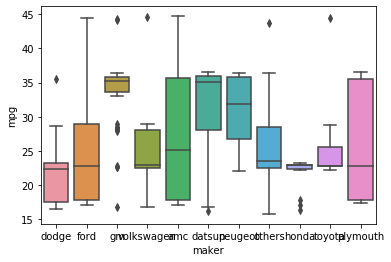

In [50]:
sns.boxplot(x='maker', y='mpg', data=train)

- One-hot-encoding

##### 各説明変数間の相関

In [51]:
X = train.drop(['id','car name'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 499
Data columns (total 9 columns):
mpg             491 non-null float64
cylinders       491 non-null int64
displacement    491 non-null int64
horsepower      491 non-null float64
weight          491 non-null int64
acceleration    491 non-null float64
model year      491 non-null int64
origin          491 non-null int64
maker           491 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 58.4+ KB


In [52]:
# floatに変換
X['cylinders'] = X['cylinders'].astype('float64')
X['displacement'] = X['displacement'].astype('float64')
X['weight'] = X['weight'].astype('float64')
X['model year'] = X['model year'].astype('float64')
X['origin'] = X['origin'].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 499
Data columns (total 9 columns):
mpg             491 non-null float64
cylinders       491 non-null float64
displacement    491 non-null float64
horsepower      491 non-null float64
weight          491 non-null float64
acceleration    491 non-null float64
model year      491 non-null float64
origin          491 non-null float64
maker           491 non-null object
dtypes: float64(8), object(1)
memory usage: 58.4+ KB


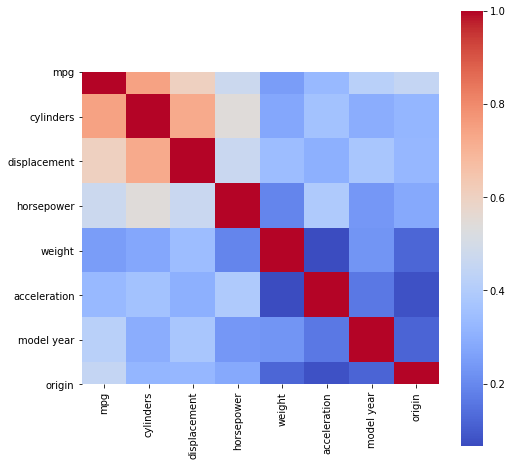

In [53]:
# 相関行列のヒートマップ
plt.figure(figsize=(8,8))
sns.heatmap(abs(X.corr()), square=True, cmap='coolwarm')

In [54]:
# 相関行列の表示
corr_mat = X.corr()
corr_mat

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.745555,-0.603526,-0.475102,-0.252576,0.331995,0.419402,0.453098
cylinders,-0.745555,1.000000,0.724739,0.543220,0.278290,-0.360654,-0.294936,-0.321312
displacement,-0.603526,0.724739,1.000000,0.467606,0.340711,-0.302129,-0.374638,-0.323237
horsepower,-0.475102,0.543220,0.467606,1.000000,0.194244,-0.394821,-0.236939,-0.282340
weight,-0.252576,0.278290,0.340711,0.194244,1.000000,0.066996,-0.229082,-0.122413
acceleration,0.331995,-0.360654,-0.302129,-0.394821,0.066996,1.000000,0.165286,0.078310
model year,0.419402,-0.294936,-0.374638,-0.236939,-0.229082,0.165286,1.000000,0.119016
origin,0.453098,-0.321312,-0.323237,-0.282340,-0.122413,0.078310,0.119016,1.000000


<BarContainer object of 8 artists>

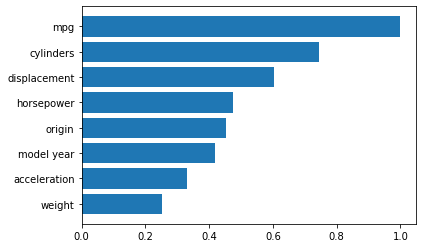

In [36]:
# mpgと相関が高い説明変数
values = corr_mat['mpg'].values
columns = corr_mat['mpg'].index

# ソート
abs_sort = np.sort(abs(values))
abs_sort_ind = np.argsort(abs(values))

# 描画
plt.barh(columns[abs_sort_ind], abs_sort)

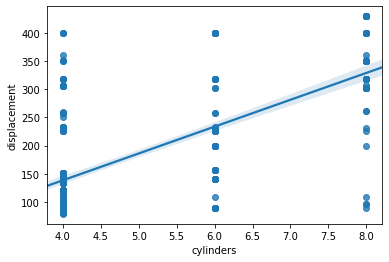

In [37]:
# cylinders - displacement
sns.regplot(x='cylinders', y='displacement', data=X)

In [38]:
corr_mat['mpg']

mpg             1.000000
cylinders      -0.745555
displacement   -0.603526
horsepower     -0.475102
weight         -0.252576
acceleration    0.331995
model year      0.419402
origin          0.453098
Name: mpg, dtype: float64

In [39]:
corr_mat['cylinders']

mpg            -0.745555
cylinders       1.000000
displacement    0.724739
horsepower      0.543220
weight          0.278290
acceleration   -0.360654
model year     -0.294936
origin         -0.321312
Name: cylinders, dtype: float64

###### mpgと相関が高そうな説明変数
- cylinders
- displacement
- hoursepower
- model year

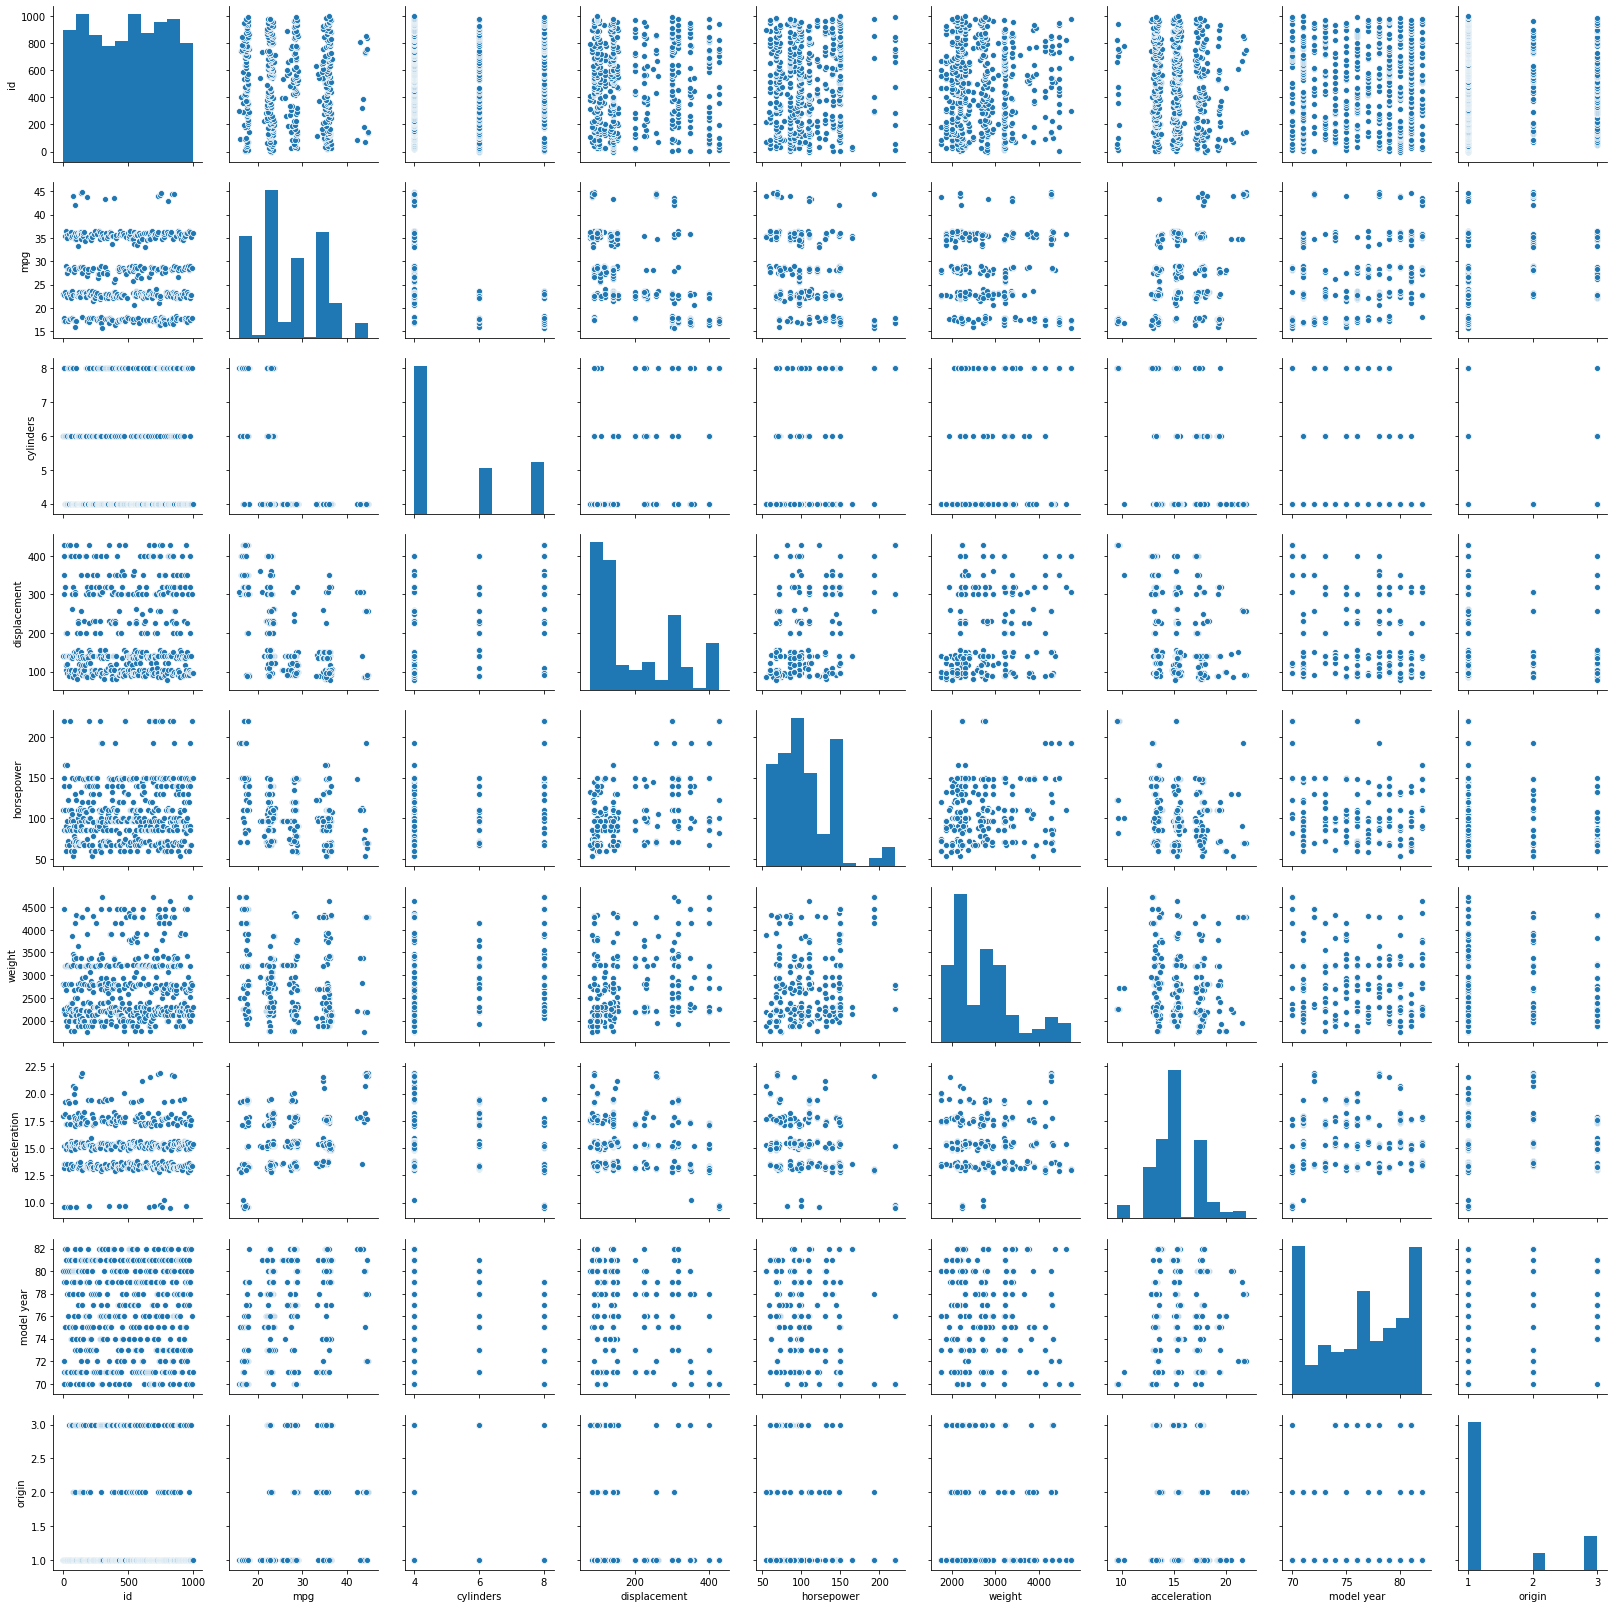

In [40]:
sns.pairplot(train)